# About the company
Nearly New Nautical is a website that allows users to advertise their used boats for sale.


# Business Goal
Increasing the number of readers by 75% this year.


# Business Task
Understand the boats with more views : 
* Are they expensive?
* What do they have in common?

# About the dataset
### Column Name:       Details
* Price :         ~ Character, boat price listed in different currencies (e.g. EUR, Â£, CHF etc.) on the website
* Boat Type:      ~ Character, type of the boat
* Manufacturer:   ~ Character, manufacturer of the boat
* Type:           ~ Character, condition of the boat and engine type(e.g. Diesel, Unleaded, etc.)
* Year Built:     ~ Numeric, year of the boat built
* Length:         ~ Numeric, length in meter of the boat
* Width:          ~ Numeric, width in meter of the boat
* Material:       ~ Character, material of the boat (e.g. GRP, PVC, etc.)
* Location:       ~ Character, location of the boat is listed
* Number of views last 7 days:   ~Numeric, number of the views of the list last 7 days

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm

In [2]:
# import dataset
df = pd.read_csv('/kaggle/input/boat-data/boat_data.csv')
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58


In [3]:
# check out the) data info
print(df.describe())
print(df.shape)

        Year Built       Length        Width  Number of views last 7 days
count  9888.000000  9879.000000  9832.000000                  9888.000000
mean   1893.192860    11.570017     3.520124                   149.160801
std     460.201582     6.002820     1.220534                   151.819752
min       0.000000     1.040000     0.010000                    13.000000
25%    1996.000000     7.470000     2.540000                    70.000000
50%    2007.000000    10.280000     3.330000                   108.000000
75%    2017.000000    13.930000     4.250000                   172.000000
max    2021.000000   100.000000    25.160000                  3263.000000
(9888, 10)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB
None


# Data Cleaning

In [5]:
# standardize the column name
df = df.rename(columns = str.lower)
df.rename(columns = {'number of views last 7 days' : 'number_of_views_last_7_days', 'year built' : 'year_built'}, inplace = True)
df.columns

Index(['price', 'boat type', 'manufacturer', 'type', 'year_built', 'length',
       'width', 'material', 'location', 'number_of_views_last_7_days'],
      dtype='object')

In [6]:
# removing duplicate enteries
df.drop_duplicates(inplace = True)
# check how many duplicates were removed
no_rows = df.shape
print(no_rows[0])

9888


There are no duplicates

In [7]:
# find missing value
df.isnull().any()

price                          False
boat type                      False
manufacturer                    True
type                            True
year_built                     False
length                          True
width                           True
material                        True
location                        True
number_of_views_last_7_days    False
dtype: bool

There are missing values in the following columns:
* manufacturer
* type
* length
* width
* material
* location

In [8]:
# count the numbers of missing values
print(df.isnull().sum())

price                             0
boat type                         0
manufacturer                   1338
type                              6
year_built                        0
length                            9
width                            56
material                       1749
location                         36
number_of_views_last_7_days       0
dtype: int64


Remove missing values since there is no way of knowing the missing values

In [9]:
#remove all missing values except where year_built is 0
df = df[df['year_built'] != 0]
df.dropna(inplace = True)
df.isna().sum()

price                          0
boat type                      0
manufacturer                   0
type                           0
year_built                     0
length                         0
width                          0
material                       0
location                       0
number_of_views_last_7_days    0
dtype: int64

In [10]:
#separate the values in price column to have currency and amount in different columns
#create new cloumns
new = df['price'].str.split(" ", n = 1, expand = True)
df['currency'] = new[0]
df['amount'] = new[1]
df.drop(columns = ['price'], inplace = True)
df.head()

,boat type,manufacturer,type,year_built,length,width,material,location,number_of_views_last_7_days,currency,amount
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,EUR,3490
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,EUR,3399
10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland,239,CHF,3500
12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,Italy,69,EUR,3500
13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,Switzerland,113,CHF,4600


In [11]:
#standadize price to one currency
#identify unique currencies
print(df['currency'].unique())

['EUR' 'CHF' 'DKK' 'Â£']


convert all currency to USD
* 1 USD = 0.96 EUR
* 1 USD = 0.94 CHF
* 1 USD = 7.14 DKK
* 1 USD = 3.67 ÂE

In [12]:
#convert amount column to int type
df['amount'] = df['amount'].apply(pd.to_numeric)
#convert to usd 
for x, y in df.iterrows():
    if y['currency'] == 'CHF':
     df.loc[x,'amount'] = np.round(df.loc[x,'amount'] *1.05,2)
    elif y['currency'] == 'EUR':
    	df.loc[x,'amount'] = np.round(df.loc[x,'amount'] *1.06,2)
    elif y['currency'] == 'DKK':
    	df.loc[x,'amount'] = np.round(df.loc[x,'amount'] *0.14,2)
    elif y['currency'] == 'Â£ ':
    	df.loc[x,'amount'] = np.round(df.loc[x,'amount'] *1.23,2)


    
df['currency'] = 'USD'

In [13]:
df.head()

,boat type,manufacturer,type,year_built,length,width,material,location,number_of_views_last_7_days,currency,amount
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,USD,3699.40
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,USD,3602.94
10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland,239,USD,3675.00
12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,Italy,69,USD,3710.00
13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,Switzerland,113,USD,4830.00


# Data Exploration

the task is in relation with the boat with the most view understanding common features so we'll be identifying the boats with the most view

In [14]:
## Create Engine Type Column
df['engine_type'] = df['type'].str.split(pat = ',', expand = True)[1]

## Convert None to nan
df['engine_type'] = df['engine_type'].replace('None', np.nan)
df

,boat type,manufacturer,type,year_built,length,width,material,location,number_of_views_last_7_days,currency,amount,engine_type
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,USD,3699.40,None
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,USD,3602.94,None
10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland,239,USD,3675.00,Electric
12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,Italy,69,USD,3710.00,None
13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,Switzerland,113,USD,4830.00,None
...,...,...,...,...,...,...,...,...,...,...,...,...
9877,Cabin Boat,Princess power boats,Used boat,1974,7.20,2.70,GRP,Switzerland,1299,USD,5250.00,None
9878,"Sport Boat,Wakeboard/Wakesurf,Water ski",Tullio Abbate power boats,"Used boat,Unleaded",1980,6.00,2.10,GRP,Switzerland,1917,USD,5248.95,Unleaded
9882,Fishing Boat,Staempfli power boats,"Used boat,Unleaded",1984,6.00,1.62,Plastic,Switzerland,288,USD,5197.50,Unleaded
9885,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,Germany,354,USD,4768.94,Unleaded


In [15]:
#Create Condition column
df['condition'] = df['type'].str.split(pat = ' ', expand = True)[0]

df['condition'] = df['condition'].replace({'Unleaded':np.nan, 0:np.nan})
df['condition'] = df['condition'].replace({'Diesel':np.nan, 0:np.nan})
df['condition'] = df['condition'].replace({'Electric':np.nan, 0:np.nan})

df.loc[df['condition'] == 'Display', 'condition'] = 'new'


In [16]:
# check out how many unique values each column has
for x in df.columns:
	print(str(x) + ' : ' + str(df[x].nunique()))
df.shape

boat type : 109
manufacturer : 807
type : 23
year_built : 78
length : 1341
width : 493
material : 10
location : 98
number_of_views_last_7_days : 654
currency : 1
amount : 2334
engine_type : 6
condition : 2


(6589, 13)

In [17]:
#sort the table the views columns in descending order
df.sort_values('number_of_views_last_7_days', ascending = False)

,boat type,manufacturer,type,year_built,length,width,material,location,number_of_views_last_7_days,currency,amount,engine_type,condition
9580,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",1992,7.70,2.46,Plastic,Switzerland,3263,USD,15645.0,Unleaded,Used
8723,Hardtop,Princess power boats,"Used boat,Diesel",1979,11.12,3.88,GRP,Switzerland,2432,USD,36750.0,Diesel,Used
6211,"Bowrider,Motor Yacht,Sport Boat",Windy power boats,"Used boat,Diesel",2002,12.35,3.48,GRP,Switzerland,2261,USD,132195.0,Diesel,Used
3700,Hardtop,Pershing power boats,"Used boat,Diesel",2009,20.30,5.20,GRP,Neustadt,2154,USD,1005940.0,Diesel,Used
308,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1993,6.14,2.34,Plastic,Switzerland,2026,USD,20895.0,Unleaded,Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7138,Flybridge,Bertram Yacht power boats,"Used boat,Unleaded",1985,9.99,3.81,GRP,France,19,USD,74200.0,Unleaded,Used
2517,Hardtop,Jeanneau power boats,"new boat from stock,Diesel",2018,10.36,3.05,PVC,United,18,USD,229950.0,Diesel,new
7458,Center console boat,BÃ©nÃ©teau power boats,"new boat from stock,Unleaded",2020,6.41,2.48,PVC,France,18,USD,66568.0,Unleaded,new
7800,Center console boat,BÃ©nÃ©teau power boats,"new boat from stock,Unleaded",2020,6.41,2.45,PVC,France,15,USD,57134.0,Unleaded,new


## Are the most expensive boats the most viewed boats?

checking out the number of view for most expensive boats

In [18]:
# working on rows with views greater than the mean for the top 10 amount
df[df['number_of_views_last_7_days']>df['number_of_views_last_7_days'].mean()].nlargest(10,'amount').sort_values('number_of_views_last_7_days', ascending = False)


,boat type,manufacturer,type,year_built,length,width,material,location,number_of_views_last_7_days,currency,amount,engine_type,condition
3327,Mega Yacht,Benetti power boats,"Used boat,Diesel",2007,56.00,10.40,Steel,Greece,419,USD,24910000.0,Diesel,Used
3317,Mega Yacht,Sunseeker power boats,"Used boat,Diesel",2019,35.36,7.35,GRP,Italy,317,USD,12614000.0,Diesel,Used
3323,Mega Yacht,Baglietto power boats,"Used boat,Diesel",2010,41.70,8.00,Aluminium,Italy,267,USD,10494000.0,Diesel,Used
3353,Mega Yacht,Cantieri di Pisa power boats,"Used boat,Diesel",2004,38.30,7.50,GRP,Greece,227,USD,7208000.0,Diesel,Used
3321,Mega Yacht,Sunseeker power boats,"Used boat,Diesel",2018,35.20,7.35,GRP,Spain,225,USD,11448000.0,Diesel,Used
3322,Mega Yacht,Sanlorenzo power boats,Used boat,2016,36.50,7.60,GRP,Netherlands,220,USD,11130000.0,None,Used
3332,Mega Yacht,Sunseeker power boats,Used boat,2012,40.05,8.09,GRP,Netherlands,219,USD,9805000.0,None,Used
3319,Mega Yacht,Sunseeker power boats,"Used boat,Diesel",2017,35.36,7.35,GRP,Monaco,197,USD,11660000.0,Diesel,Used
3320,Mega Yacht,Sunseeker power boats,"Used boat,Diesel",2015,40.23,7.83,GRP,France,178,USD,9995000.0,Diesel,Used
3348,Mega Yacht,Sunseeker power boats,"Used boat,Diesel",2013,34.53,7.41,GRP,Monaco,163,USD,7367000.0,Diesel,Used


from the table we can see that the number of views for the highest amount(most expensive) are low

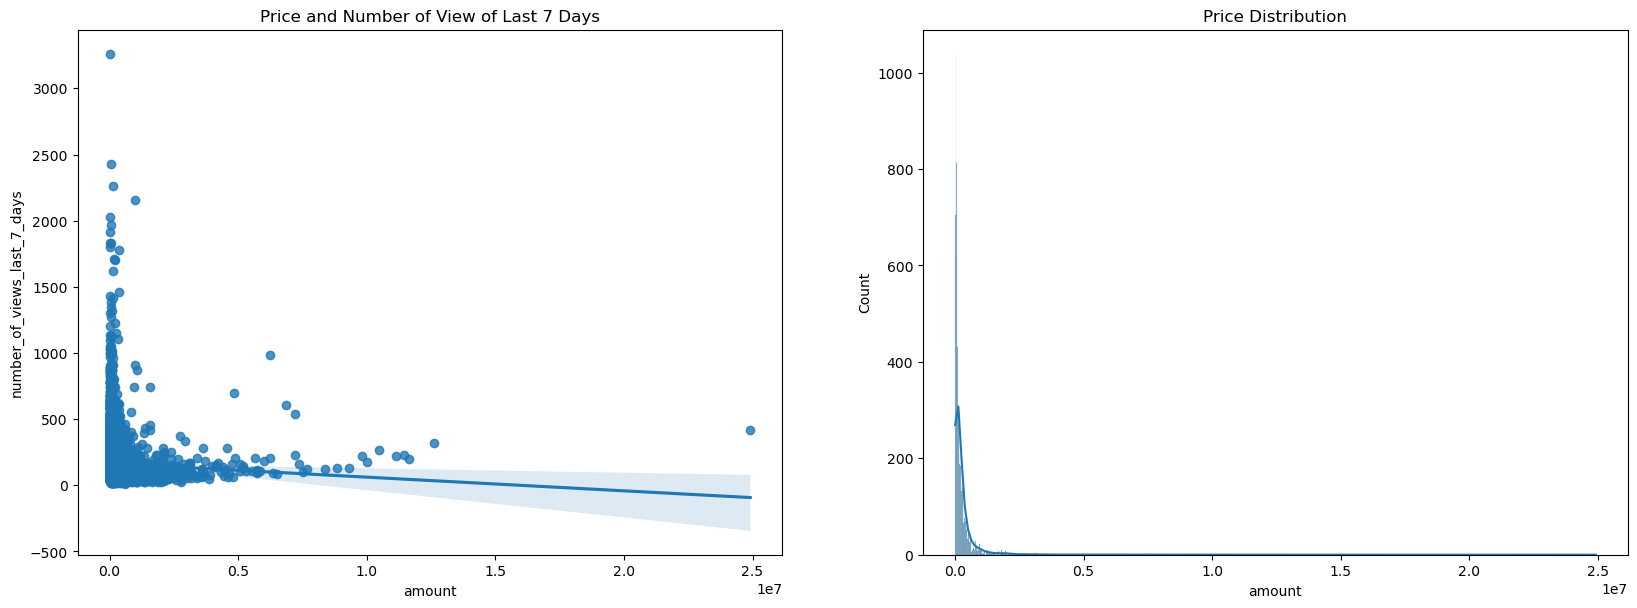

In [19]:
#use a sctterplot to see if there's a relationship between views and amount
fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.regplot(y = 'number_of_views_last_7_days', x = 'amount', data = df)
ax1.set_title('Price and Number of View of Last 7 Days')
ax2 = fig.add_subplot(224)
sns.histplot(df['amount'], kde = True)
ax2.set_title("Price Distribution")
plt.show()

* The graph shows that there's a weak negative correlation between views and amount, as amount increases number of views decreases

In [20]:
# group amount into distributions
print(df['amount'].quantile([0.25, 0.50, 0.75]))
df['amount'].max()

0.25     47594.0
0.50     99750.0
0.75    259700.0
Name: amount, dtype: float64


24910000.0

In [21]:
df['price_group']= pd.cut(df['amount'], bins = [0,47594.0,99750.0,31000000.0], labels = ['Cheap (less than 47600)', 'Medium (47600-260000)','Expensive (more than 260000)'])
df['price_group'].value_counts()

Expensive (more than 260000)    3293
Cheap (less than 47600)         1660
Medium (47600-260000)           1636
Name: price_group, dtype: int64

Text(0.5, 1.0, 'Average views last 7 days per Price group')

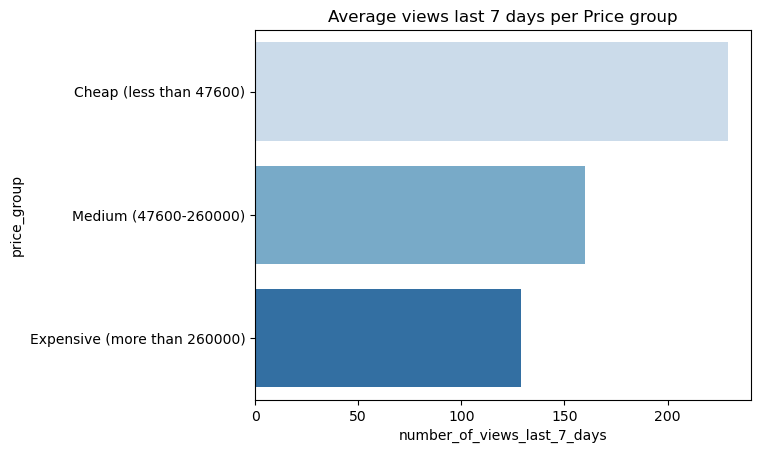

In [22]:
price_group= df.groupby('price_group')['number_of_views_last_7_days'].mean().reset_index(drop=False)

sns.barplot(y='price_group', x='number_of_views_last_7_days', data=price_group,
                 palette="Blues")
plt.title("Average views last 7 days per Price group")

* Boats that are Cheap(less than 47600) have the highest average views

## What are the features of the boats with the most views?

Identify the correlation betweeen views and the other attributes

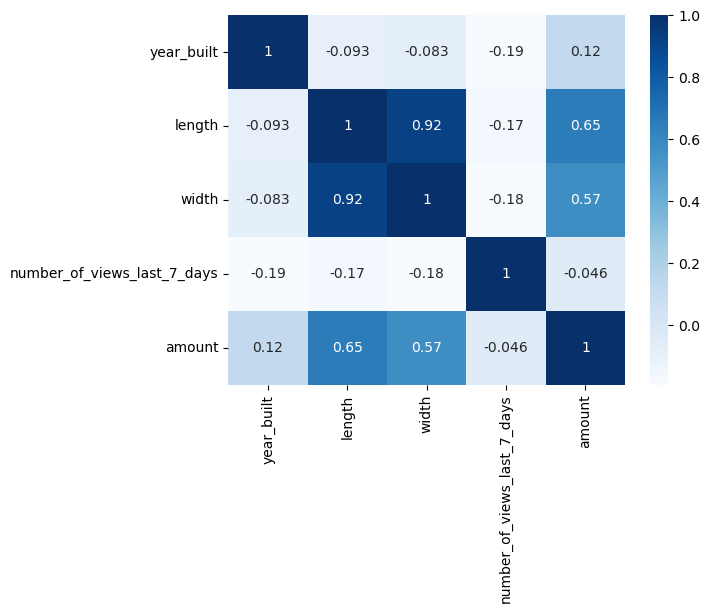

In [23]:
#plot a heatmap to show relationship
sns.heatmap(data = df.corr(), cmap = 'Blues', annot = True)
plt.show()

analyze the density of length and width

Text(0.5, 1.0, 'Width Distribution')

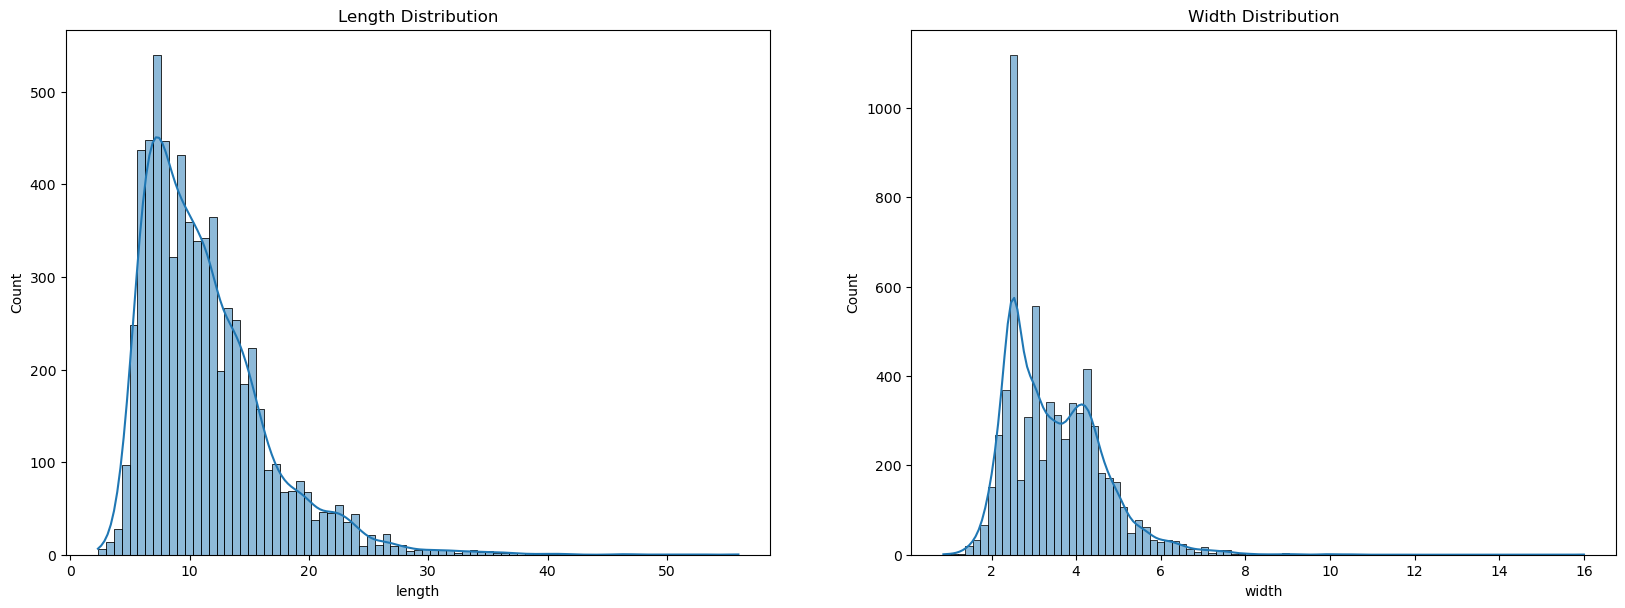

In [24]:
fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.histplot(df['length'], kde= True)
ax1.set_title("Length Distribution")
ax2 = fig.add_subplot(224)
sns.histplot(df['width'], kde = True)
ax2.set_title("Width Distribution")


Text(0.5, 1.0, 'Width and  Number of views last 7 days ')

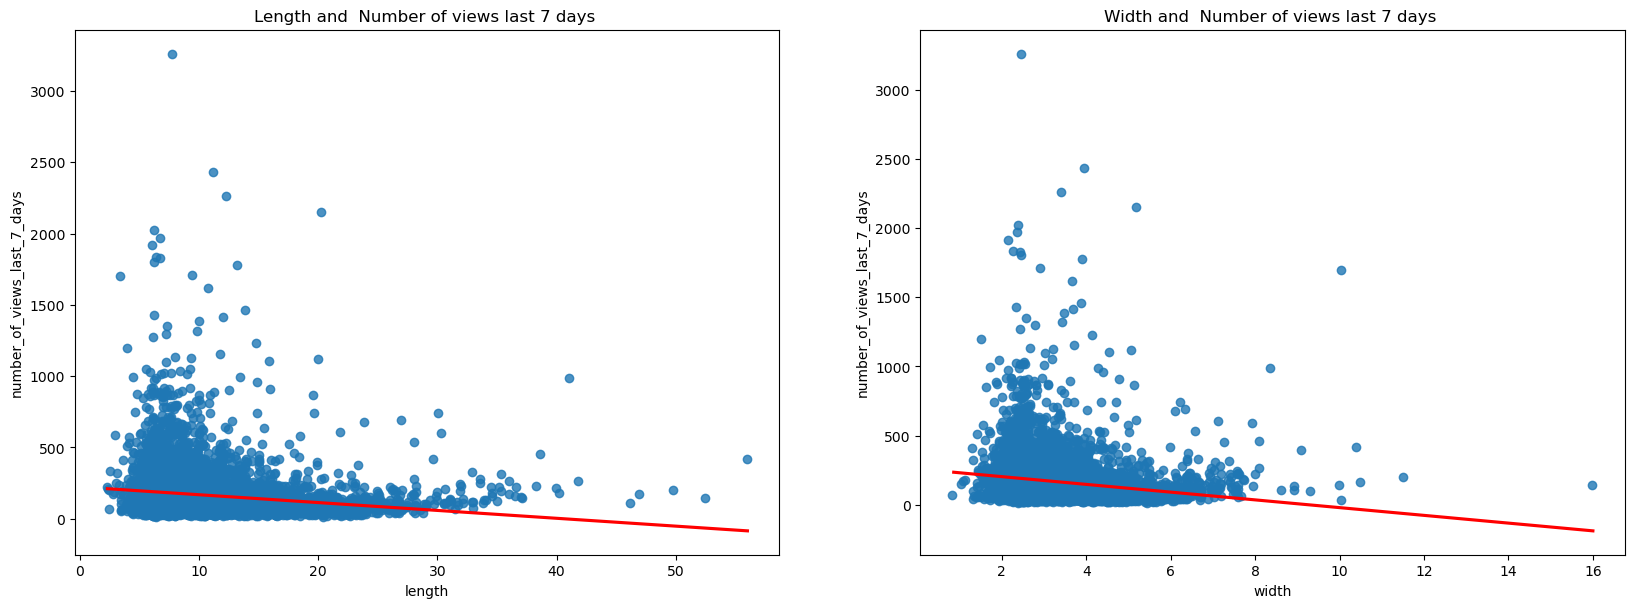

In [25]:
fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.regplot(x='length', y='number_of_views_last_7_days', data=df, line_kws={'color': 'red'}, ci=None, x_jitter=0.1)
ax1.set_title("Length and  Number of views last 7 days ")
ax2 = fig.add_subplot(224)
sns.regplot(x='width', y='number_of_views_last_7_days', data=df, line_kws={'color': 'red'}, ci=None, x_jitter=0.1)
ax2.set_title("Width and  Number of views last 7 days ")

### identify the attributes with the most average views

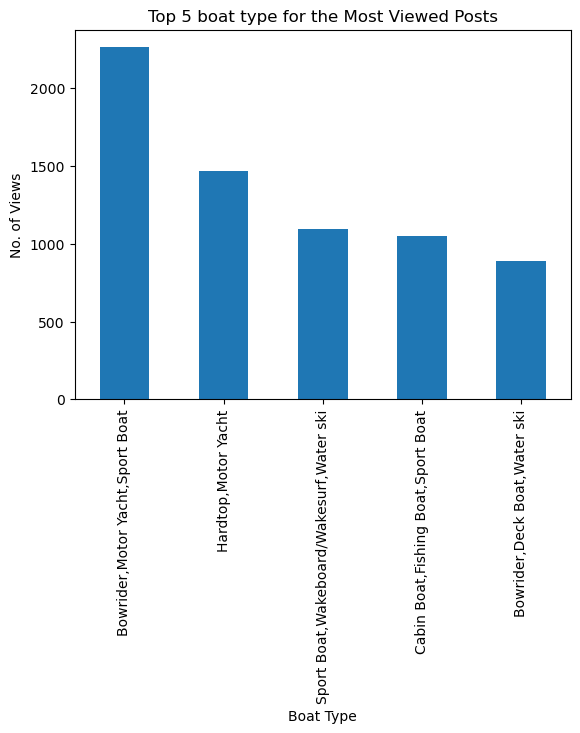

In [26]:
df.groupby('boat type')['number_of_views_last_7_days'].mean().sort_values(ascending = False).head(5).plot(kind = 'bar')
plt.title('Top 5 boat type for the Most Viewed Posts')
plt.xlabel('Boat Type')
plt.ylabel('No. of Views')
plt.show()

* The boat type with the most view are Bowrider, sport boat and motor yacht
* people prefer fun boats

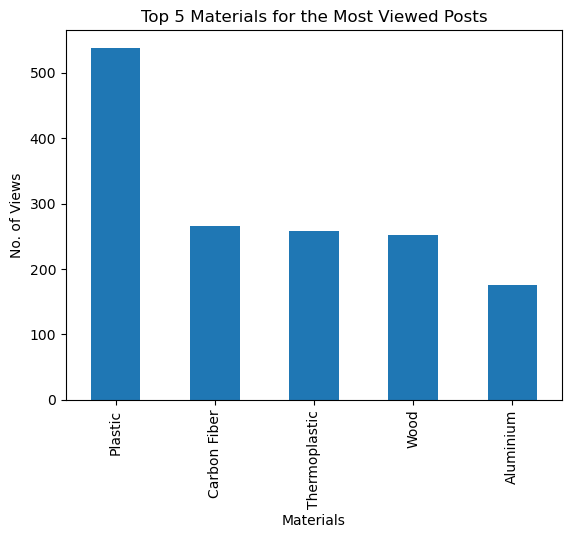

In [27]:
#plot a graph of number of views against all attributes
df.groupby('material')['number_of_views_last_7_days'].mean().sort_values(ascending = False).head(5).plot(kind = 'bar')
plt.title('Top 5 Materials for the Most Viewed Posts')
plt.xlabel('Materials')
plt.ylabel('No. of Views')
plt.show()


* plasic material has the highest average view
* people like boat made with plastic for recreational purpose


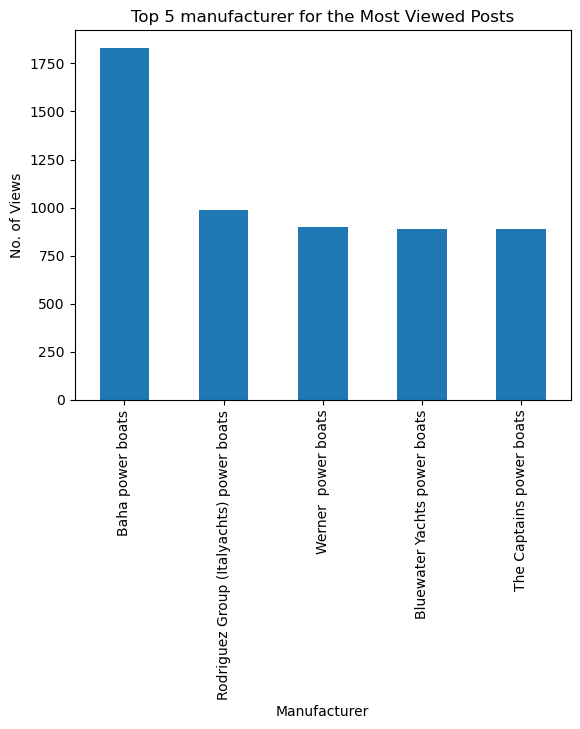

In [28]:
df.groupby('manufacturer')['number_of_views_last_7_days'].mean().sort_values(ascending = False).head(5).plot(kind = 'bar')
plt.title('Top 5 manufacturer for the Most Viewed Posts')
plt.xlabel('Manufacturer')
plt.ylabel('No. of Views')
plt.show()

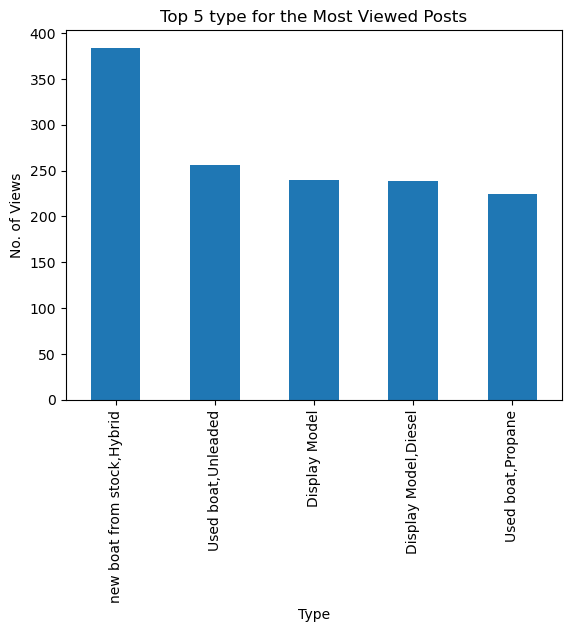

In [29]:

df.groupby('type')['number_of_views_last_7_days'].mean().sort_values(ascending = False).head(5).plot(kind = 'bar')
plt.title('Top 5 type for the Most Viewed Posts')
plt.xlabel('Type')
plt.ylabel('No. of Views')
plt.show()

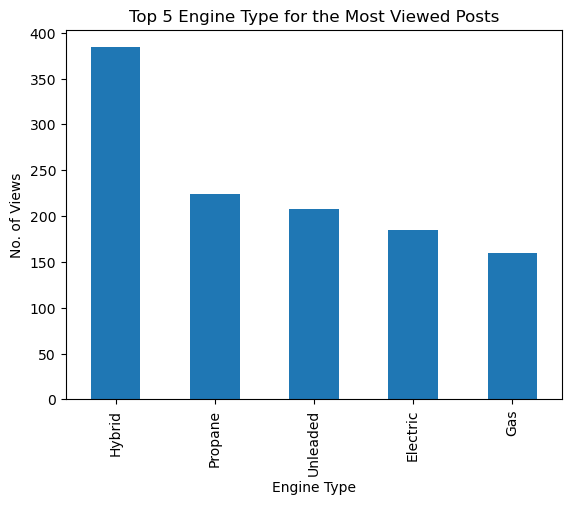

In [30]:
df.groupby('engine_type')['number_of_views_last_7_days'].mean().sort_values(ascending = False).head(5).plot(kind = 'bar')
plt.title('Top 5 Engine Type for the Most Viewed Posts')
plt.xlabel('Engine Type')
plt.ylabel('No. of Views')
plt.show()

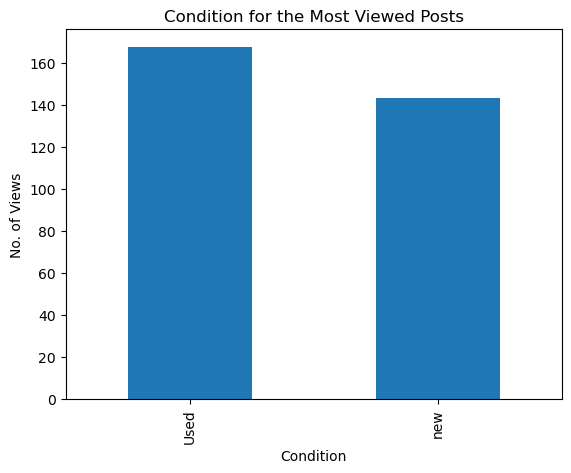

In [31]:
df.groupby('condition')['number_of_views_last_7_days'].mean().sort_values(ascending = False).head(5).plot(kind = 'bar')
plt.title('Condition for the Most Viewed Posts')
plt.xlabel('Condition')
plt.ylabel('No. of Views')
plt.show()

* hybrid has the most average view
* Used boat has more average view

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'France'),
  Text(1, 0, 'Portugal'),
  Text(2, 0, 'Spain'),
  Text(3, 0, 'Croatia'),
  Text(4, 0, 'Netherlands'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'Germany'),
  Text(7, 0, 'Austria'),
  Text(8, 0, 'Other'),
  Text(9, 0, 'Switzerland')])

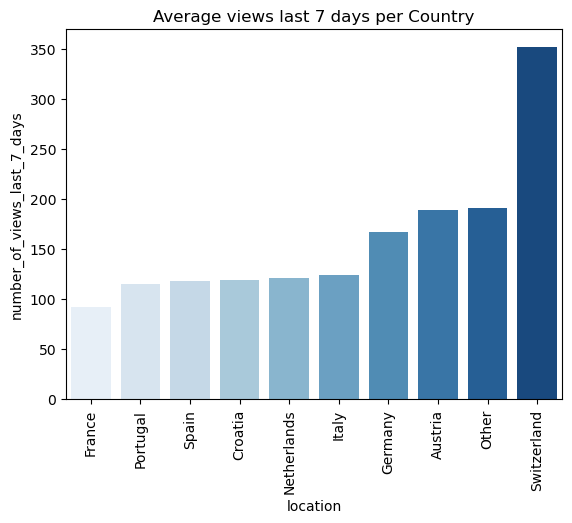

In [32]:
# top countries with countries by count
top10_country = df.location.value_counts().iloc[:10].index

df.loc[~df['location'].isin(top10_country),'location']='Other'
# average view for the top countries
df_view= df.groupby('location')['number_of_views_last_7_days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='location', y='number_of_views_last_7_days', data=df_view[-10:],
                 palette="Blues")
plt.title("Average views last 7 days per Country")
plt.xticks(rotation = 90)

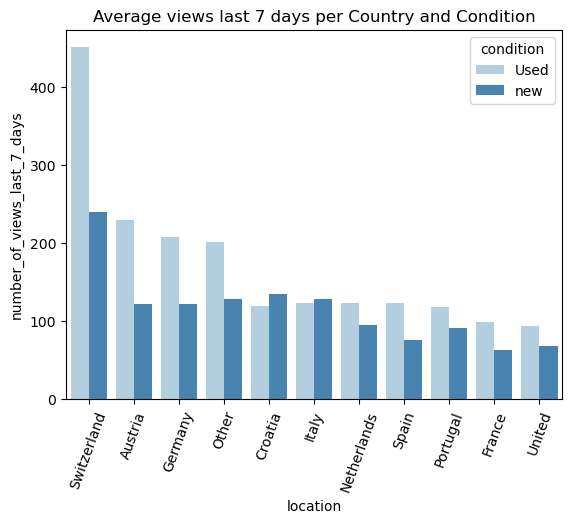

In [33]:
df_View= df.groupby(['location','condition'])['number_of_views_last_7_days'].mean().reset_index(drop=False).sort_values(by=['number_of_views_last_7_days','location'],ascending=False)
sns.barplot(x='location', y='number_of_views_last_7_days',hue='condition', data= df_View,
                 palette="Blues")
plt.title("Average views last 7 days per Country and Condition")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)

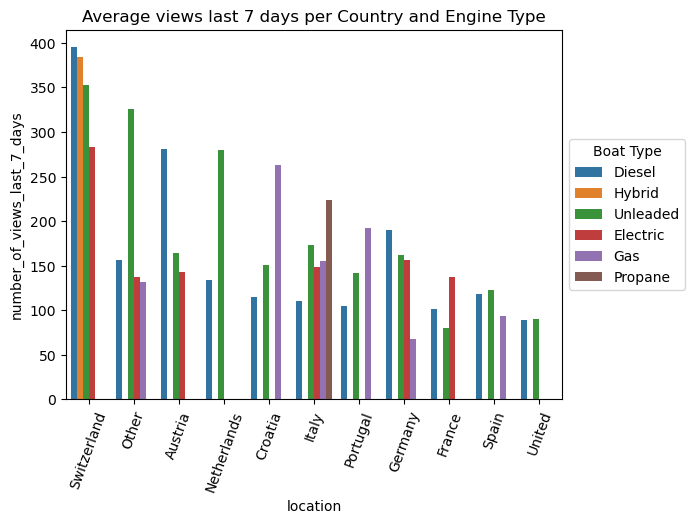

In [34]:

df_View= df.groupby(['location','engine_type'])['number_of_views_last_7_days'].mean().reset_index(drop=False).sort_values(by=['number_of_views_last_7_days','location'],ascending=False)
sns.barplot(x='location', y='number_of_views_last_7_days',hue='engine_type', data=df_View)
plt.title("Average views last 7 days per Country and Engine Type")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)
plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5), title = 'Boat Type')


* Most countries prefer unleaded boat type, it varies for each country
* Switzerland perfer Diesel
* Italy prefer propane
* Portugal prefer gas
* France prefer electric

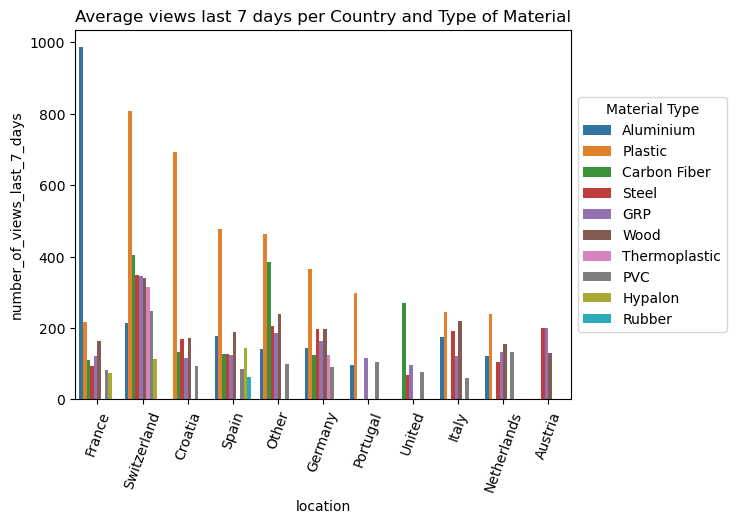

In [35]:

df_View= df.groupby(['location','material'])['number_of_views_last_7_days'].mean().reset_index(drop=False).sort_values(by=['number_of_views_last_7_days','location'],ascending=False)
sns.barplot(x='location', y='number_of_views_last_7_days',hue='material', data=df_View)
plt.title("Average views last 7 days per Country and Type of Material")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)
plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5), title = 'Material Type')


* Switzerland has the highest average view
* Crotia and Italy have high demand for new boats
* All countries prefer boats made of plastic except France which prefer aluminium and United Kingdom that prefer carbon fiber

Understanding the distribution of the year built

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


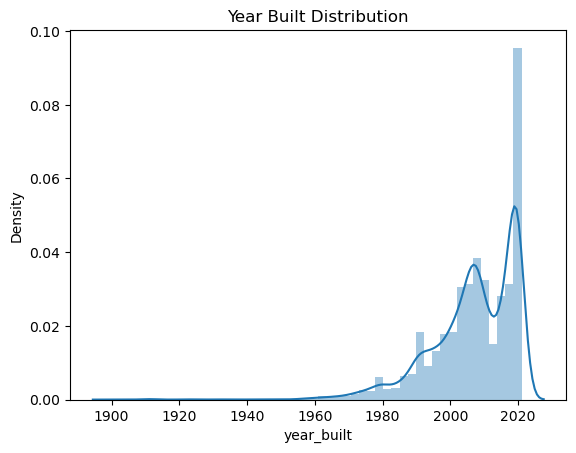

In [36]:
sns.distplot(df['year_built'])
plt.title("Year Built Distribution")
plt.show()

In [37]:
# group the year into 4 distributions
print(df['year_built'].quantile([0.25, 0.50, 0.75]))
df['year_built'].max()

0.25    2000.0
0.50    2008.0
0.75    2018.0
Name: year_built, dtype: float64


2021

In [38]:
df['age_group']  = pd.cut(df['year_built'], bins = [0,2000,2018, 2022], labels = ['Very Old (built before 2000)', 'Old (built between 2000-2017)','Modern (built after 2018)'])
df['age_group'].value_counts()

Old (built between 2000-2017)    3425
Very Old (built before 2000)     1654
Modern (built after 2018)        1510
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Average views last 7 days per age_group')

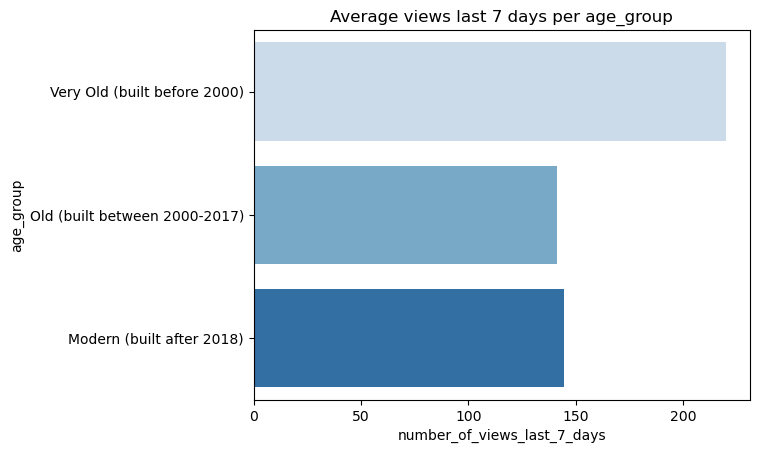

In [39]:
age_group= df.groupby('age_group')['number_of_views_last_7_days'].mean().sort_values().reset_index(drop=False)

sns.barplot(y='age_group', x='number_of_views_last_7_days', data=age_group,
                 palette="Blues")
plt.title("Average views last 7 days per age_group")

* Boats built before 2000 have the highest average views.

# Conclusion
## Key Findings

* Boats that are Cheap (less than 44290) have highest average views.
* There's a weak negative correlation between length and number of views.
* The boat type with the most view are Bowrider, sport boat and motor yacht : people prefer fun boats.
* Plasic material has the highest average view : people like boat made with plastic for recreational purpose.
- Average view between the used and the new boat are not too far apar.
  - in Croatia and Italy , where the demand for the new boats more then the used boats. 
  - in Switzerland and Germany, where the demand for the used boats are rocketing.
* the Country has highest average views is Switzerland.
- But the main demand varies between countries as follows:
  - Switzerland has demand on Hybird.
  - Coratia has demand on gas.
  - Italy has demand on propane.
  - France has demand on Electric.
* Most of the countries prefer Unleaded engine and Diesel more.
* All countries prefer boats made of plastic except France which prefer aluminium and United Kingdom that prefer carbon fiber
* Boats that are Very Old (built before 2000) have highest average views.






## Recommendations
Publishing an advertisement in one of the well-known magazines or creating a newsletter that includes vacations and entertainment and at least two types of boats, used sport boat and used motor yacht. We emphasise that the engine type is Unleaded engine and Diesel, that the boats' materials are plastic, and that the boats are old and cheap.

Because tastes fluctuate from one country to the next, it is recommended that each advertisement be adapted for each unique country.

Because Switzerland and Germany have a high number of viewers, they are of importance to us, thus it is advisable to publish an advertising bulletin for them to clearly express their consumer preferences.